# Assignment 2.1 Use Case - Tayko Software Cataloger

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import dmba

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from dmba import backward_elimination, forward_selection, stepwise_selection

from dmba import regressionSummary
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary
%matplotlib inline

This case study examines how Tayko, a software catalog firm that sells games and educational software, prepared to launch a revised collection of items in a new catalog mailing. Tayko began as a software manufacturer and later expanded its offerings to include third-party titles, making its customer list a valuable asset. Because mailing is costly and most recipients are unlikely to purchase, the objective is to minimize wasted expenses by identifying customers with a higher probability of responding. In this analysis, logistic regression, multiple linear regression, and regression trees are applied to recommend which customers should receive the catalog and to estimate their expected spending, with the goal of optimizing the mailing campaign and improving gross profits.


In [262]:
df=pd.read_csv('Tayko.csv')

# Basic information
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
df.head()

Shape of dataset: (2000, 25)

Data types:
 sequence_number         int64
US                      int64
source_a                int64
source_c                int64
source_b                int64
source_d                int64
source_e                int64
source_m                int64
source_o                int64
source_h                int64
source_r                int64
source_s                int64
source_t                int64
source_u                int64
source_p                int64
source_x                int64
source_w                int64
Freq                    int64
last_update_days_ago    int64
1st_update_days_ago     int64
Web order               int64
Gender=male             int64
Address_is_res          int64
Purchase                int64
Spending                int64
dtype: object


,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0


In [263]:
df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.62500
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.78261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,2.00000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,153.00000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.00000


In [264]:
display(df.columns)

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [265]:
df.isnull().sum() # Check for missing values

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64

## 1. Gross Profit = Expect Revenue - Mailing Cost

In [266]:
# 1. Computer the average spending perv person in the test mailing (Including purchase and non purchased, non purchaser spent = 0)
ave_spending = df['Spending'].mean()

# 2. Get the total revunue which is the answer multiply 180,000

expected_revenue = ave_spending * 180_000
mailing_cost = 180_000 * 2


# 3. Substract the mailing cost: 180,000 x 2 =$360,000
gross_profit = expected_revenue - mailing_cost

print('Average spending per person:', ave_spending)
print('Expected revenue:', expected_revenue)
print('mailing cost:', mailing_cost)
print('Gross profit:', gross_profit)


Average spending per person: 102.625
Expected revenue: 18472500.0
mailing cost: 360000
Gross profit: 18112500.0


In [267]:
df["US"].value_counts()

US
1    1649
0     351
Name: count, dtype: int64

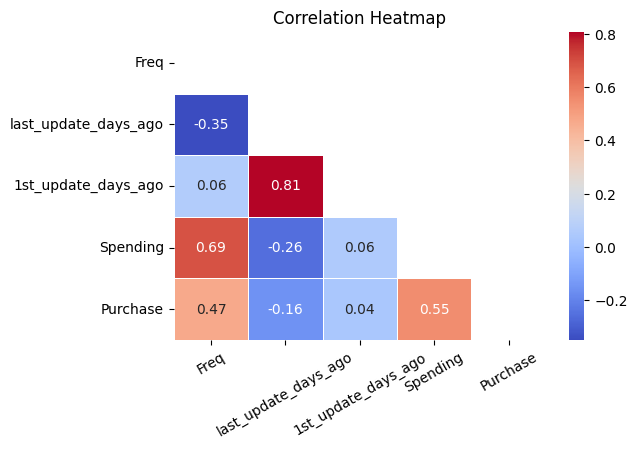

In [268]:
numeric_features = ["Freq", "last_update_days_ago", "1st_update_days_ago", "Spending", "Purchase"]
df_numeric = df[numeric_features]
corr = df_numeric.corr()

# Upper Triangle plot
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6,4))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, 
            annot_kws={"size": 10}, fmt=".2f", linewidths=0.5)
plt.xticks(rotation=30)
plt.title("Correlation Heatmap")
plt.show()

In [269]:
# Define target
target = "Purchase"

# Exclude continous features
exclude_cols = ["sequence_number", "Spending", "Freq", 
                "last_update_days_ago", "1st_update_days_ago"]
# Candidate categorical/binary predictors
predictors = [c for c in df.columns if c not in exclude_cols + [target]]

# Run chi-square test for each predictor
results = []
for col in predictors:
    contingency = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency)
    results.append({"Feature": col, "Chi2": chi2, "p-value": p, "dof": dof})

# Convert to DataFrame
chi2_df = pd.DataFrame(results).sort_values("p-value")

# Format p-values to normal decimals
chi2_df["p-value"] = chi2_df["p-value"].apply(lambda x: round(x, 6))

print("Chi-square test results (features vs Purchase):")
print(chi2_df)

Chi-square test results (features vs Purchase):
           Feature        Chi2   p-value  dof
16       Web order  112.923476  0.000000    1
1         source_a   88.689589  0.000000    1
8         source_h   64.329690  0.000000    1
12        source_u   46.743101  0.000000    1
7         source_o   24.708326  0.000001    1
3         source_b   19.583333  0.000010    1
10        source_s    9.388047  0.002184    1
13        source_p    6.790744  0.009163    1
2         source_c    5.003405  0.025298    1
11        source_t    4.658293  0.030904    1
15        source_w    4.317260  0.037728    1
5         source_e    4.247303  0.039313    1
4         source_d    1.256984  0.262223    1
0               US    0.884590  0.346947    1
17     Gender=male    0.801925  0.370518    1
9         source_r    0.783604  0.376041    1
6         source_m    0.492983  0.482600    1
14        source_x    0.028287  0.866436    1
18  Address_is_res    0.026139  0.871562    1


## 2. Logistic regression Modeling (Model for classifying a customer as a purchaser or nonpurchaser)

### 2.1 Train/Validation/Test Split (Stratified 800 / 700 / 500)

In [270]:
#predictors = df.drop(columns=["Spending", "Purchase"], errors="ignore")


X = df.drop(columns=["Spending", "Purchase", "sequence_number"], errors="ignore")
y =df["Purchase"]

train_X, tmp_X, train_y, tmp_y =train_test_split(X, y, train_size=800, stratify=y, random_state=42)

valid_X, test_X, valid_y, test_y =train_test_split(tmp_X, tmp_y, test_size=500, stratify=tmp_y, random_state=42)

print('train_X shape:', train_X.shape[0])
print('valid_X shape:', valid_X.shape[0]) 
print('test_X shape:', test_X.shape[0])

train_X shape: 800
valid_X shape: 700
test_X shape: 500


### 2.2 Logistic Regression (L2, lbfgs) — Trained on Training Set; Probabilities & Validation Performance

In [271]:
from dmba import classificationSummary
# Build pipeline: standardize features, then logistic regression
pipe = Pipeline([("scaler", StandardScaler()), 
                 ("logit", LogisticRegression(penalty="l2", max_iter=1000, solver="lbfgs"))])

# Train model (training set only)
pipe.fit(train_X, train_y)

# probabilities & predictions 
proba = pipe.predict_proba(valid_X)        # shape (n, 2) -> columns for classes [0, 1]
pred  = pipe.predict(valid_X)

# acc = accuracy_score(valid_y, val_pred)
# auc = roc_auc_score(valid_y, val_proba)

# build  result frame
full_result = pd.DataFrame({
    'actual':    valid_y.values,
    'p(0)':      proba[:, 0],
    'p(1)':      proba[:, 1],   # purchase probability
    'predicted': pred
}).sort_values('p(1)', ascending=False)

classificationSummary(full_result.actual, full_result.predicted)
print("classification_report:\n")
print(classification_report(valid_y, pred, digits=3))

Confusion Matrix (Accuracy 0.8143)

       Prediction
Actual   0   1
     0 283  67
     1  63 287
classification_report:

              precision    recall  f1-score   support

           0      0.818     0.809     0.813       350
           1      0.811     0.820     0.815       350

    accuracy                          0.814       700
   macro avg      0.814     0.814     0.814       700
weighted avg      0.814     0.814     0.814       700



In [272]:
# # Build pipeline: first standardize features, then logistic regression
# pipe = Pipeline([("scaler", StandardScaler()), 
#                  ("logit", LogisticRegression(penalty="l2", max_iter=1000, solver="lbfgs"))])

# # Train model (training set only)
# pipe.fit(train_X, train_y)

# # Probability of purchase=1
# val_proba = pipe.predict_proba(valid_X)[:, 1]       # probability of Purchase=1

# # Predict
# val_pred = (val_proba >= 0.5).astype(int)  # classify using 0.5 cutoff

# # Evaluate classification on the validation set
# acc = accuracy_score(valid_y, val_pred)
# auc = roc_auc_score(valid_y, val_proba)

# cm = confusion_matrix(valid_y, val_pred, labels=[0,1])

# # Result
# cm_df = pd.DataFrame(
#     cm,
#     index=["Actual 0", "Actual 1"],       # rows (true labels)
#     columns=["Pred 0", "Pred 1"]          # cols (predicted labels)
# )
# print("Validation Results:")
# print(results, "\n")
# print("confusion_matrix:\n")
# print(confusion_matrix(valid_y, val_pred))
# print("classification_report:")
# print(classification_report(valid_y, val_pred, digits=3))

In [273]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegressionCV
# from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# # 仅选择数值列（包括0/1二元变量与连续变量），并对数值列做标准化
# num_cols = train_X.select_dtypes(include="number").columns

# preprocess = ColumnTransformer(
#     transformers=[("num", StandardScaler(), num_cols)],
#     remainder="drop"      # 只用数值列
# )

# # Logistic Regression with L2, lbfgs, CV=5  —— 只在训练集上拟合
# logit_cv = LogisticRegressionCV(
#     Cs=10,
#     cv=5,
#     penalty="l2",
#     solver="lbfgs",
#     max_iter=500,
#     scoring="roc_auc",
#     n_jobs=-1)

# clf = Pipeline(steps=[("prep", preprocess), ("logit", logit_cv)])

# # 训练
# clf.fit(train_X, train_y)

# # —— 用训练好的模型进行分类：给出购买概率与0/1标签（默认阈值0.5）
# def evaluate(split_name, X, y, thr=0.5):
#     proba = clf.predict_proba(X)[:, 1]
#     pred  = (proba >= thr).astype(int)
#     print(f"\n[{split_name}]  Acc={accuracy_score(y, pred):.3f}  AUC={roc_auc_score(y, proba):.3f}")
#     print("Confusion matrix:\n", confusion_matrix(y, pred))
#     print(classification_report(y, pred, digits=3))
#     return proba, pred

# # 验证集与测试集效果（训练集也可看，但评分以val/test为准）
# val_proba,  val_pred  = evaluate("Validation", valid_X, valid_y, thr=0.5)
# test_proba, test_pred = evaluate("Test",       test_X,  test_y,  thr=0.5)

# # 如需查看被选择的最佳C与各特征系数（按num_cols次序）
# best_C = clf.named_steps["logit"].C_[0]
# coefs  = clf.named_steps["logit"].coef_.ravel()
# coef_table = pd.DataFrame({"feature": num_cols, "coef": coefs}).sort_values("coef", ascending=False)
# print("\nBest C selected by CV:", best_C)
# print("\nTop coefficients (positive -> 更可能购买):")
# print(coef_table.head(10))

Interpretation 2.1 and 2.2: the model achieves about 80.9% accuracy, with precision=0.803 and recall=0.817 for purchasers, indicating solid discrimination between buyers and non-buyers. The confusion matrix shows that 70 non-purchasers would be mistakenly targeted (wasted mailings), while 64 true purchasers would be missed. The model does a good job ranking which customers are most likely to buy. It performs much better than sending catalogs at random and provides purchase probabilities that can be used to guide profit analysis.

## 3. Models for predicting spending among the purchasers

### 3.1 Purchaser only subsets
From previous defined training and validation sets, keep only records where Purchase = 1. Define predictors X and target y = Spending.

In [274]:
print(train_y.value_counts())

Purchase
1    400
0    400
Name: count, dtype: int64


In [275]:
# 3.1: Purchaser-only subsets; redefine X and y for Spending

# filters for train/validation rows
train_filter = df.index.isin(train_X.index)
valid_filter = df.index.isin(valid_X.index)

# Keep only purchasers (Purchase == 1)
train_purch = df[train_filter & (df["Purchase"] == 1)]
valid_purch = df[valid_filter & (df["Purchase"] == 1)]

# Define predictors (drop targets/ID-like columns) and new target = Spending
X_train_p = train_purch.drop(columns=["Purchase", "Spending", "sequence_number"], errors="ignore")
y_train_p = train_purch["Spending"]

X_valid_p = valid_purch.drop(columns=["Purchase", "Spending", "sequence_number"], errors="ignore")
y_valid_p = valid_purch["Spending"]

# Quick check
print("Train purchasers:", X_train_p.shape, y_train_p.shape)
print("Valid purchasers:", X_valid_p.shape, y_valid_p.shape)

Train purchasers: (400, 22) (400,)
Valid purchasers: (350, 22) (350,)


In [276]:
y_train_p

2        127
14       192
23       174
29       354
45       159
        ... 
1972     320
1980      98
1986     145
1989    1030
1994     184
Name: Spending, Length: 400, dtype: int64

#### 3.2.1 Multiple linear regression

In [277]:
lr = LinearRegression()
lr.fit(X_train_p, y_train_p)
#print coefficients
print('intercept', lr.intercept_)
coef_table = pd.DataFrame({"Predictor": X_train_p.columns,
                           "Coefficient": lr.coef_})
display(coef_table)
# Print performance measures 
# # based on the trainig set (purchasers)
regressionSummary(y_train_p, lr.predict(X_train_p))

intercept 122.90673571037372


,Predictor,Coefficient
0,US,18.618756
1,source_a,22.970667
2,source_c,-43.699780
3,source_b,-37.639370
4,source_d,-65.071902
5,source_e,-39.933289
6,source_m,-55.665131
7,source_o,41.312097
8,source_h,-152.976257
9,source_r,49.381204



Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 181.8183
            Mean Absolute Error (MAE) : 108.5417
          Mean Percentage Error (MPE) : -83.3628
Mean Absolute Percentage Error (MAPE) : 112.4249


In [278]:
# Get predictions based on X_valid_p
lin_pred = lr.predict(X_valid_p)

# Get RMSE and MAE on validation set
lin_rmse = np.sqrt(mean_squared_error(y_valid_p, lin_pred))
lin_mae = mean_absolute_error(y_valid_p, lin_pred)

result = pd.DataFrame({'Predicted': lin_pred, 'Actual': y_valid_p, 
                       'Residual': y_valid_p - lin_pred})

print(result.head(20))

# based on the validation set
regressionSummary(y_valid_p, lin_pred)

      Predicted  Actual    Residual
0     88.797490     128   39.202510
8    444.408741     489   44.591259
9    170.077343     174    3.922657
18    94.592360     130   35.407640
20   283.733158     386  102.266842
21   276.931351     161 -115.931351
24   229.195120     131  -98.195120
25   147.620586     189   41.379414
31   175.242849     352  176.757151
41   207.158200      34 -173.158200
43   830.957907     639 -191.957907
44   253.905185     638  384.094815
50   241.647766     232   -9.647766
54   170.793172     375  204.206828
60   244.617923     136 -108.617923
78   201.305580     161  -40.305580
81   168.674359     129  -39.674359
83   238.870108      98 -140.870108
86   199.759076     158  -41.759076
105  147.586064     405  257.413936

Regression statistics

                      Mean Error (ME) : -21.1440
       Root Mean Squared Error (RMSE) : 144.9845
            Mean Absolute Error (MAE) : 99.8359
          Mean Percentage Error (MPE) : -92.6650
Mean Absolute Percentage 

75% residual threshold: 134.40496491556274
0.7457142857142857


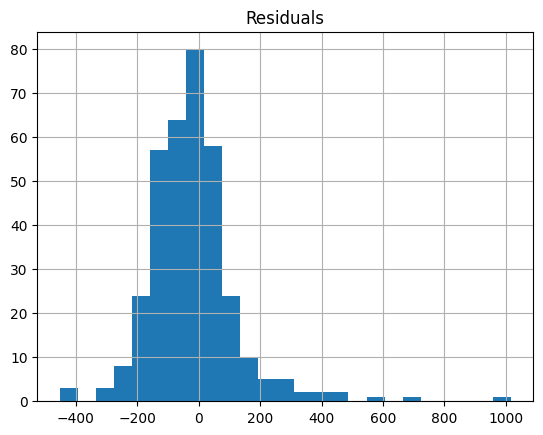

In [279]:
# DetermineDetermine the percentage of datapoints with a residual in 75% threshold
residuals = y_valid_p - lin_pred
# Take absolute value
abs_resid = np.abs(residuals)

# 75th percentile threshold
threshold = np.percentile(abs_resid, 75)

# Percentage of data points within this threshold
within_75 = np.mean(abs_resid <= threshold) * 100

print("75% residual threshold:", threshold)
print(len(residuals[(residuals > -134) & (residuals < 134)]) /len(residuals))
pd.DataFrame({"Residuals": residuals}).hist(bins=25)
plt.show()

Most prediction errors are centered around zero with a roughly symmetric distribution, and about 75% of the residuals fall within a moderate range, means the model good fit with some larger outliers.

#### 3.2.2 Regression trees

In [280]:
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train_p, y_train_p)

tree_pred = tree.predict(X_valid_p)
tree_rmse = np.sqrt(mean_squared_error(y_valid_p, tree_pred))
tree_mae = mean_absolute_error(y_valid_p, tree_pred)


#### 3.2.3 Model selection and explain
Compare both models on the validation set, choose the better one.

In [281]:
print("Validation Results:")
print(f"Linear Regression: RMSE={lin_rmse:.2f}, MAE={lin_mae:.2f}")
print(f"Regression Tree:   RMSE={tree_rmse:.2f}, MAE={tree_mae:.2f}")

# Choose model with lower error
if tree_rmse < lin_rmse:
    print("→ Regression Tree performs better on validation set.")
else:
    print("→ Linear Regression performs better on validation set.")

Validation Results:
Linear Regression: RMSE=144.98, MAE=99.84
Regression Tree:   RMSE=175.23, MAE=104.98
→ Linear Regression performs better on validation set.


##### stepwise forward selection for the linear regression 

In [260]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Forward stepwise on TRAIN only
base_lr = LinearRegression()
sfs = SequentialFeatureSelector(
    base_lr, direction="forward", n_features_to_select="auto",
    scoring="neg_mean_squared_error", cv=5, n_jobs=-1
).fit(X_train_p, y_train_p)

# Selected features and final fit
sel_feats = X_train_p.columns[sfs.get_support()]
lr = LinearRegression().fit(X_train_p[sel_feats], y_train_p)

# Validate
lr_pred = lr.predict(X_valid_p[sel_feats])
lr_rmse = np.sqrt(mean_squared_error(y_valid_p, lr_pred))
lr_mae  = mean_absolute_error(y_valid_p, lr_pred)

print("Stepwise LR selected:", list(sel_feats))
print(f"Validation — Linear Regression: RMSE={lr_rmse:.2f}, MAE={lr_mae:.2f}")

Stepwise LR selected: ['source_a', 'source_c', 'source_d', 'source_m', 'source_h', 'source_t', 'source_p', 'Freq', 'last_update_days_ago', 'Gender=male', 'Address_is_res']
Validation — Linear Regression: RMSE=144.79, MAE=98.02


Intepretation 3.2.3: The goal in Question 3 was to predict how much a customer will spend if they purchase. Between the two models tested, multiple linear regression achieved lower errors (RMSE = 144.98, MAE = 99.84) than the regression tree (RMSE = 175.23, MAE = 104.98). Stepwise regression further confirmed the strength of the linear model, and validation results showed it predicts spending more accurately. Therefore, linear regression is chosen as the better model for forecasting spending.

In [218]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth":[3,4,5,6,8], "min_samples_leaf":[5,10,20]}
gcv = GridSearchCV(DecisionTreeRegressor(random_state=42),
                   param_grid, scoring="neg_mean_squared_error",
                   cv=5, n_jobs=-1).fit(X_train_p, y_train_p)

tree = gcv.best_estimator_
tree_pred = tree.predict(X_valid_p)
tree_rmse = np.sqrt(mean_squared_error(y_valid_p, tree_pred))
tree_mae  = mean_absolute_error(y_valid_p, tree_pred)

print("Best tree params:", gcv.best_params_)
print(f"Validation — Regression Tree: RMSE={tree_rmse:.2f}, MAE={tree_mae:.2f}")

Best tree params: {'max_depth': 3, 'min_samples_leaf': 10}
Validation — Regression Tree: RMSE=163.81, MAE=103.30


## 4. 

### 4.1 add a column - Logistic regression

### 4.2 add another column - predict spending amount from he prediction model chosen

### 4.3 skip

### 4.4 add a column for expected spending 

### 4.5 plot cumulative gains chart of the expected spending

### 4.6 using this cumulative gai9ns curve (not directly), estimate the gross profit - based on the model.